# Chapter 05 - Array-Based Sequences

## Reinforcement

### R-5.1
Execute the experiment from Code Fragment 5.1 and compare the results
on your system to those we report in Code Fragment 5.2.

In [24]:
import sys
data = []
n = 12
for k in range(n):
    a = len(data)
    b = sys.getsizeof(data)
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(a, b))
    data.append(None)


Length:   0; Size in bytes:   64
Length:   1; Size in bytes:   96
Length:   2; Size in bytes:   96
Length:   3; Size in bytes:   96
Length:   4; Size in bytes:   96
Length:   5; Size in bytes:  128
Length:   6; Size in bytes:  128
Length:   7; Size in bytes:  128
Length:   8; Size in bytes:  128
Length:   9; Size in bytes:  192
Length:  10; Size in bytes:  192
Length:  11; Size in bytes:  192


### R-5.2
In Code Fragment 5.1, we perform an experiment to compare the length of
a Python list to its underlying memory usage. Determining the sequence
of array sizes requires a manual inspection of the output of that program.
Redesign the experiment so that the program outputs only those values of
k at which the existing capacity is exhausted. For example, on a system
consistent with the results of Code Fragment 5.2, your program should
output that the sequence of array capacities are 0, 4, 8, 16, 25, . . . .

In [25]:
import sys
data = []
n = 27
old_size = sys.getsizeof(data)
array_capacities = []
for k in range(n):
    length = len(data)
    new_size = sys.getsizeof(data)
    if new_size != old_size:
        array_capacities.append(str(k-1)) # Capacity was exhausted one iteration ago
        old_size = new_size
    data.append(None)

print("The sequence of array capacities are {},...".format(", ".join(array_capacities)))

The sequence of array capacities are 0, 4, 8, 16, 25,...


### R-5.3
Modify the experiment from Code Fragment 5.1 in order to demonstrate
that Python’s list class occasionally shrinks the size of its underlying array
when elements are popped from a list.

In [26]:
import sys
n = 8
data = [None for _ in range(n)]

for i in range(n):
    length = len(data)
    b = sys.getsizeof(data)
    print("Length: {0:3d}; Size in bytes: {1:4d}".format(length, b))
    del data[-1]

Length:   8; Size in bytes:  128
Length:   7; Size in bytes:  128
Length:   6; Size in bytes:  128
Length:   5; Size in bytes:  128
Length:   4; Size in bytes:  128
Length:   3; Size in bytes:  112
Length:   2; Size in bytes:  104
Length:   1; Size in bytes:   96


### R-5.4
Our DynamicArray class, as given in Code Fragment 5.3, does not support
use of negative indices with getitem . Update that method to better
match the semantics of a Python list.

In [27]:
%run ch05/dynamic_array_5_4 

class DynamicArray_5_4(DynamicArray):

    def __init__(self):
        super().__init__()

    def __getitem__(self, k):
        """Return element at index k."""
        if not -self._n <= k < self._n:
          raise IndexError('invalid index')
        return self._A[k]                              # retrieve from array


dyn_arr = DynamicArray_5_4()
dyn_arr.append(1)
dyn_arr.append(2)
print(dyn_arr[-1])

2


### R-5.6
Our implementation of insert for the DynamicArray class, as given in
Code Fragment 5.5, has the following inefficiency. In the case when a resize
occurs, the resize operation takes time to copy all the elements from
an old array to a new array, and then the subsequent loop in the body of
insert shifts many of those elements. Give an improved implementation
of the insert method, so that, in the case of a resize, the elements are
shifted into their final position during that operation, thereby avoiding the
subsequent shifting.

In [28]:
%run ch05/dynamic_array_5_6

class Dynamic_Array_5_6(DynamicArray):

    def __init__(self):
        super().__init__()

    def insert(self, k, value):
        """Insert value at index k, shifting subsequent values rightward."""
        # (for simplicity, we assume 0 <= k <= n in this verion)

        if self._n == self._capacity:                  # not enough room
            #self._resize(2 * self._capacity)          # so double capacity
            B = self._make_array(2 * self._capacity)
            for i in range(k):  # for each existing value
                B[i] = self._A[i]
            B[k] = value
            for j in range(k, self._n):
                B[j+1] = self._A[j]
            self._A = B  # use the bigger array
            self._n += 1
            self._capacity = self._capacity * 2

        else:
            for j in range(self._n, k, -1):                # shift rightmost first
                self._A[j] = self._A[j-1]
            self._A[k] = value                             # store newest element
            self._n += 1


dyn_arr = Dynamic_Array_5_6()
dyn_arr.insert(0, 1)
dyn_arr.insert(0, 0)
print(dyn_arr[0], dyn_arr[1])

0 1


### R-5.7
Let A be an array of size n ≥ 2 containing integers from 1 to n−1, inclusive,
with exactly one repeated. Describe a fast algorithm for finding the
integer in A that is repeated.

In [29]:
# This algorithm runs in O(n log(n) + n) = O(n log(n))


def find_repeated(A):
    dict = {i:0 for i in range(len(A))}
    print(dict)
    for value in A:
        dict[value] += 1
        if dict[value] == 2:
            return value
    return None


A = [1, 3, 3, 4, 5]
print(find_repeated(A))

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
3


### R-5.8
Experimentally evaluate the efficiency of the pop method of Python’s list
class when using varying indices as a parameter, as we did for insert on
page 205. Report your results akin to Table 5.5.

In [30]:
import timeit

Ns = []

# creating result lists
k_0 = []
k_equal_n_over_2 = []
k_equal_n = []
running_times = [k_0, k_equal_n_over_2, k_equal_n]

min_N_magnitude = 2
max_N_magnitude = 6

ks = ["0", "n//2", "-1"]

# Verifying runtime
for index, running_time in enumerate(running_times):
    for new_int in range(min_N_magnitude, max_N_magnitude):
        n = 10**new_int
        Ns.append(n)

        j = n//10   # testing the method on n//10 elements


        stmt = """
for i in range({}):
    lst.pop({})""".format(j, ks[index])

        setup = """n = {}
lst = [i for i in range(n)]""".format(n)

        t = timeit.Timer(stmt, setup=setup)

        number = 10  # number of repetition to obtain average result
        total_time = sum(t.repeat(number, 1))
        avg_time = total_time / (number*j)  # divide by number and by j to obtain average time for a single pop()

        running_time.append(avg_time)

print("""\n
Average runtime of using pop() method on n/10 element of lists of length n
Lines test for varying positions for the index k, pop(k) for k = 0, n//2, n
Rows test for varying lengths of the list, going from {} to {} by factors of 10\n""".format(min_N_magnitude, max_N_magnitude-1))

[print(i) for i in running_times]

print("""\n
It is clear that using pop() at the end of the list is O(1), 
but using it at the beginning or in the middle is O(n)""")




Average runtime of using pop() method on n/10 element of lists of length n
Lines test for varying positions for the index k, pop(k) for k = 0, n//2, n
Rows test for varying lengths of the list, going from 2 to 5 by factors of 10

[2.2099999998914655e-07, 2.7650000000534194e-07, 2.117789999999786e-06, 2.8083774000000013e-05]
[4.540000000119449e-07, 2.467999999886672e-07, 1.0428699999994962e-06, 1.1441501999999986e-05]
[1.6500000004526783e-07, 1.2060000000602146e-07, 1.0756999999976813e-07, 9.420300000002157e-08]


It is clear that using pop() at the end of the list is O(1), 
but using it at the beginning or in the middle is O(n)


### R-5.9
Explain the changes that would have to be made to the program of Code
Fragment 5.11 so that it could perform the Caesar cipher for messages
that are written in an alphabet-based language other than English, such as
Greek, Russian, or Hebrew.

In [31]:
# Code Fragment 5.11 is caeser_5_9.py in the folder named ch05

# encoder[k] = chr((k + shift) % 26 + ord('A'))
# decoder[k] = chr((k - shift) % 26 + ord('A'))

# The original encoder and decoder use ord('A').
# To use it in another language, simply replace the letter A 
# with the first letter of the new alphabet.

### R-5.10
The constructor for the CaesarCipher class in Code Fragment 5.11 can
be implemented with a two-line body by building the forward and backward
strings using a combination of the join method and an appropriate
comprehension syntax. Give such an implementation.

In [32]:
# Code Fragment 5.11 is caeser_5_10.py in the folder named ch05

# Original constructor
def __init__(self, shift):
    """Construct Caesar cipher using given integer shift for rotation."""
    encoder = [None] * 26  # temp array for encryption
    decoder = [None] * 26  # temp array for decryption
    for k in range(26):
        encoder[k] = chr((k + shift) % 26 + ord('A'))
        decoder[k] = chr((k - shift) % 26 + ord('A'))
    self._forward = ''.join(encoder)  # will store as string
    self._backward = ''.join(decoder)  # since fixed


# Equivalent constructor
def __init__(self, shift):
    self._forward = "".join([chr((k + shift) % 26 + ord("A")) for k in range(26)])
    self._backward = "".join([chr((k - shift) % 26 + ord("A")) for k in range(26)])

### R-5.11
Use standard control structures to compute the sum of all numbers in an
n×n data set, represented as a list of lists.

In [33]:
def sum_list_of_list(lst):
    total = 0
    for line in lst:
        for element in line:
            total += element
    return total


n = 3
my_list = [[n*j + i  for i in range(3)] for j in range(3)]
print(my_list)
print(sum_list_of_list(my_list))

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]
36


### R-5.12
Describe how the built-in sum function can be combined with Python’s
comprehension syntax to compute the sum of all numbers in an n×n data
set, represented as a list of lists.

In [34]:
n = 3
my_list = [[n*j + i for i in range(3)] for j in range(3)]
print(my_list)

total = sum([sum(line) for line in my_list])
print(total)

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]
36


## Creativity

### C-5.13
In the experiment of Code Fragment 5.1, we begin with an empty list. If
data were initially constructed with nonempty length, does this affect the
sequence of values at which the underlying array is expanded? Perform
your own experiments, and comment on any relationship you see between
the initial length and the expansion sequence.

In [35]:
import sys
for base_length in [0, 35]:
    data = [i for i in range(base_length)]
    n = 200
    old_size = sys.getsizeof(data)
    array_capacities = []
    for k in range(n):
        length = len(data)
        new_size = sys.getsizeof(data)
        if new_size != old_size:
            array_capacities.append(str(k-1)) # Capacity was exhausted one iteration ago
            old_size = new_size
        data.append(None)

    print("The sequence of array capacities are {},...".format(", ".join(array_capacities)))

print("""
We observe that the difference between capacities remain de same.
The first sequence has the numbers 35, 46, 58, 72, ...
If we substract theses numbers by the first, we get 0, 11, 23, 37, ...
As we can see, this is exacly the second sequence!
""")


The sequence of array capacities are 0, 4, 8, 16, 25, 35, 46, 58, 72, 88, 106, 126, 148, 173,...
The sequence of array capacities are 0, 11, 23, 37, 53, 71, 91, 113, 138, 166, 198,...

We observe that the difference between capacities remain de same.
The first sequence has the numbers 35, 46, 58, 72, ...
If we substract theses numbers by the first, we get 0, 11, 23, 37, ...
As we can see, this is exacly the second sequence!



### C-5.14
The shuffle method, supported by the random module, takes a Python
list and rearranges it so that every possible ordering is equally likely.
Implement your own version of such a function. You may rely on the
randrange(n) function of the random module, which returns a random
number between 0 and n−1 inclusive.

In [36]:
from random import randrange


def shuffle(lst):
    n = len(lst)
    for index, value in enumerate(lst):
        new_index = randrange(n)
        lst[index], lst[new_index] = lst[new_index], lst[index]
    return lst


lst = list(range(10))
print(lst)

lst = shuffle(lst)
print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 8, 6, 1, 3, 7, 9, 4, 0, 2]


### C-5.16
Implement a pop method for the DynamicArray class, given in Code Fragment
5.3, that removes the last element of the array, and that shrinks the
capacity, N, of the array by half any time the number of elements in the
array goes below N/4.

In [37]:
%run ch05/dynamic_array_5_16

class DynamicArray_5_16(DynamicArray):

    def __init__(self):
        super().__init__()

    def pop(self):
        """Removes the last element of the array and shrinks the capacity when needed"""
        if self._n == 0:
            raise ValueError("List is empty, cannot remove last element.")
        else:
            self._A[-1] = None
            self._n = self._n - 1
            if self._n < self._capacity / 4:
                self._resize(self._capacity // 2)

### C-5.21
In Section 5.4.2, we described four different ways to compose a long
string: (1) repeated concatenation, (2) appending to a temporary list and
then joining, (3) using list comprehension with join, and (4) using generator
comprehension with join. Develop an experiment to test the efficiency
of all four of these approaches and report your findings.

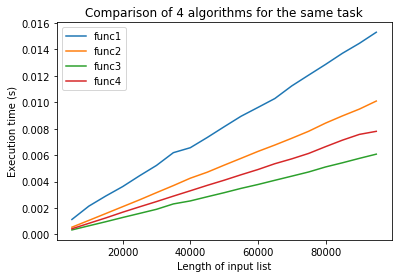

In [38]:
# Execution takes about a minute.
# You can remove the print() in the first loop to clear the console
# Keep it to show progression
#
# Every function exhibit linear behavior, but they do not share the same constant factor
# function #3 (list comprehension) seems to be the best one,
# even though the author says the best one should be #4 (generator comprehension)


import matplotlib.pyplot as plt
import timeit

# Four string composition methods in section 5.4.2
functions_setup = """
def func1(document):
    letters = ""
    for c in document:
        if c.isalpha():
            letters += c
    return letters

def func2(document):
    temp = []
    for c in document:
        if c.isalpha():
            temp.append(c)
    letters = "".join(temp)
    return letters

def func3(document):
    letters = "".join([c for c in document if c.isalpha()])
    return letters

def func4(document):
    letters = "".join((c for c in document if c.isalpha()))
    return letters
"""

# average execution times for every length of input list (Y axis data)
func_1_avg_times = []
func_2_avg_times = []
func_3_avg_times = []
func_4_avg_times = []

# list of integer to use as functions input (X axis data)
int_lst = []

# group average times to loop over them
avg_times_lst = [func_1_avg_times,
                 func_2_avg_times,
                 func_3_avg_times,
                 func_4_avg_times]

# measures the execution time of every algorithm for a given list length
for new_int in range(5000, 100000, 5000):
    int_lst.append(new_int)    # generating an increasingly long list of int to swipe x-axis

    # Printing to show progression, you can remove this part to clear the console
    # print("Computing times for a document of {} characters".format(new_int))

    for func_index, func_avg_times in enumerate(avg_times_lst, start=1):
        stmt = """func{}(document)""".format(func_index)
        setup = """document = "A" * {} """.format(new_int) + functions_setup

        t = timeit.Timer(stmt, setup)

        # repeat multiple times for every list length to obtain average times
        number = 30
        total_time = sum(t.repeat(number, 1)) # execute once per repeat to measure only the function run time
        avg_time = total_time / number

        # Append y-axis values
        func_avg_times.append(avg_time) #(new_int * np.log2(new_int))) #


# plot every result
for avg_index, avg_times in enumerate(avg_times_lst, start=1):
    plt.plot(int_lst, avg_times, label="func{}".format(avg_index))

plt.xlabel("Length of input list")
plt.ylabel("Execution time (s)")
plt.title("Comparison of {} algorithms for the same task".format(len(avg_times_lst)))
plt.legend()

plt.show()


### C-5.22
Develop an experiment to compare the relative efficiency of the extend
method of Python’s list class versus using repeated calls to append to
accomplish the equivalent task.

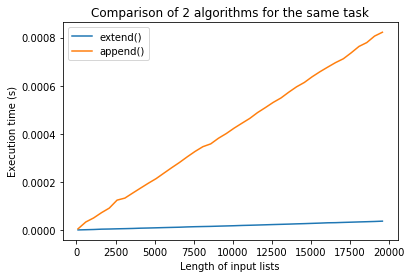

In [39]:
import matplotlib.pyplot as plt
import timeit

functions_setup = """
def func1(A, B):
    A.extend(B)
    return A

def func2(A, B):
    for element in B:
        A.append(element)
    return A
"""

# average execution times for every length of input list (Y axis data)
func_1_avg_times = []
func_2_avg_times = []

# list of integer to use as functions input (X axis data)
int_lst = []

# group average times to loop over them
avg_times_lst = [func_1_avg_times,
                 func_2_avg_times]

# measures the execution time of every algorithm for a given list length
for new_int in range(100, 20000, 500):
    int_lst.append(new_int)     # generating an increasingly long list of int to swipe x-axis

    # Printing to show progression, you can remove this part to clear the console
    # print("Computing times for two lists of {} characters".format(new_int))

    for func_index, func_avg_times in enumerate(avg_times_lst, start=1):

        stmt = """func{}(A, B)""".format(func_index)
        setup = """
A = ["A"] * {}
B = ["B"] * {}""".format(new_int, new_int) + functions_setup

        t = timeit.Timer(stmt, setup)

        # repeat multiple times for every list length to obtain average times
        number = 30
        total_time = sum(t.repeat(number, 1))   # execute once per repeat to measure only the function run time
        avg_time = total_time / number

        # Append y-axis values
        func_avg_times.append(avg_time)

# function labels
labels = ["extend()", "append()"]

# plot every result
for avg_index, avg_times in enumerate(avg_times_lst):
    plt.plot(int_lst, avg_times, label=labels[avg_index])

plt.xlabel("Length of input lists")
plt.ylabel("Execution time (s)")
plt.title("Comparison of {} algorithms for the same task".format(len(avg_times_lst)))
plt.legend()

plt.show()


### C-5.23
Based on the discussion of page 207, develop an experiment to compare
the efficiency of Python’s list comprehension syntax versus the construction
of a list by means of repeated calls to append.

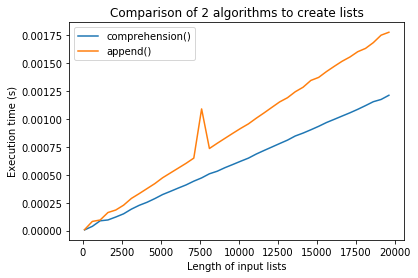

In [40]:
import matplotlib.pyplot as plt
import timeit

# Functions studied in this exercise
# They both combine two lists
# func1 uses list comprehension
# func2 uses repeated append()
functions_setup = """
def func1(length):
    squares = [k*k for k in range(1, length+1)]
    return squares

def func2(length):
    squares = []
    for k in range(1, length+1):
        squares.append(k*k)
    return squares
"""

# average execution times for every length of input list (Y axis data)
func_1_avg_times = []
func_2_avg_times = []

# list of integer to use as functions input (X axis data)
int_lst = []

# group average times to loop over them
avg_times_lst = [func_1_avg_times,
                 func_2_avg_times]

# measures the execution time of every algorithm for a given list length
for new_int in range(100, 20000, 500):
    int_lst.append(new_int)    # generating an increasingly long list of int to swipe x-axis

    # Printing to show progression, you can remove this part to clear the console
    # print("Computing times for two lists of {} characters".format(new_int))

    for func_index, func_avg_times in enumerate(avg_times_lst, start=1):

        stmt = """func{}({})""".format(func_index, new_int)
        setup = functions_setup

        t = timeit.Timer(stmt, setup)

        # repeat multiple times for every list length to obtain average times
        number = 30
        total_time = sum(t.repeat(number, 1)) # execute once per repeat to measure only the function run time
        avg_time = total_time / number

        # Append y-axis values
        func_avg_times.append(avg_time)

# function labels
labels = ["comprehension()", "append()"]

# plot every result
for avg_index, avg_times in enumerate(avg_times_lst):
    plt.plot(int_lst, avg_times, label=labels[avg_index])

plt.xlabel("Length of input lists")
plt.ylabel("Execution time (s)")
plt.title("Comparison of {} algorithms to create lists".format(len(avg_times_lst)))
plt.legend()

plt.show()


### C-5.24
Perform experiments to evaluate the efficiency of the remove method of
Python’s list class, as we did for insert on page 205. Use known values so
that all removals occur either at the beginning, middle, or end of the list.
Report your results akin to Table 5.5.

In [41]:
import timeit

Ns = []

# creating result lists
k_0 = []
k_equal_n_over_2 = []
k_equal_n = []
running_times = [k_0, k_equal_n_over_2, k_equal_n]

min_N_magnitude = 2
max_N_magnitude = 5

# testing on 10% of elements, at different positions
ks = [["0", "n//10"], ["5*n//10", "6*n//10"], ["9*n//10", "n"]]

# Verifying runtime
for index, running_time in enumerate(running_times):
    for new_int in range(min_N_magnitude, max_N_magnitude):
        n = 10**new_int
        Ns.append(n)

        j = n//10   # testing the method on n//10 elements

        stmt = """
for i in range({}, {}):
    lst.remove(i)""".format(j, ks[index][0], ks[index][1])

        setup = """n = {}
lst = [i for i in range(n)]""".format(n)

        t = timeit.Timer(stmt, setup=setup)

        number = 10  # number of repetition to obtain average result
        total_time = sum(t.repeat(number, 1))
        avg_time = total_time / (number*j)  # divide by number and by j to obtain average time for a single pop()

        running_time.append(avg_time)

print("""\n
Average runtime of using remove() method on n/10 element of lists of length n
Lines test for varying positions for the index k, pop(k) for k = 0, n//2, n
Rows test for varying lengths of the list, going from {} to {} by factors of 10\n""".format(min_N_magnitude, max_N_magnitude))

[print(i) for i in running_times]

print("""\n
It is clear that using remove() at the end of the list is O(1), 
but using it at the beginning or in the middle is O(n)""")



Average runtime of using remove() method on n/10 element of lists of length n
Lines test for varying positions for the index k, pop(k) for k = 0, n//2, n
Rows test for varying lengths of the list, going from 2 to 5 by factors of 10

[4.30000002182851e-08, 4.599999996912629e-09, 1.1500000006492429e-09]
[9.830000000476957e-07, 5.833800000019096e-06, 4.989479999999986e-05]
[1.9340000000056536e-06, 1.0308400000006657e-05, 9.625152000000056e-05]


It is clear that using remove() at the end of the list is O(1), 
but using it at the beginning or in the middle is O(n)


### C-5.25
The syntax data.remove(value) for Python list data removes only the first
occurrence of element value from the list. Give an implementation of a
function, with signature remove all(data, value), that removes all occurrences
of value from the given list, such that the worst-case running time
of the function is O(n) on a list with n elements. Not that it is not efficient
enough in general to rely on repeated calls to remove.

In [42]:
def remove_all(data, value):
    cleaned_data = [data[i] for i in range(len(data)) if data[i] != value]
    return cleaned_data


lst = [0, 1, 2, 2, 2, 3, 4]
print(lst)
print(remove_all(lst, 2))

[0, 1, 2, 2, 2, 3, 4]
[0, 1, 3, 4]


### C-5.26
Let B be an array of size n ≥ 6 containing integers from 1 to n−5, inclusive,
with exactly five repeated. Describe a good algorithm for finding the
five integers in B that are repeated.

In [43]:
def find_five_repeating(lst):
    lst = sorted(lst)
    freq = 0
    old = lst[0]
    for index in range(1, len(lst)):
        new = lst[index]
        if new == old:  # if there is a repetition, add one to freq
            freq += 1
            if freq == 5: # if freq is equal to 5, the integer is found
                return new
        else:
            freq = 1  # they are not matching, therefore freq == 1 for the new int
        old = new  # old is the old new
    return None


B = [1, 2, 2, 2, 2, 2, 5, 6]
print(find_five_repeating(B))

2


### C-5.30
When Bob wants to send Alice a message M on the Internet, he breaks M
into n data packets, numbers the packets consecutively, and injects them
into the network. When the packets arrive at Alice’s computer, they may
be out of order, so Alice must assemble the sequence of n packets in order
before she can be sure she has the entire message. Describe an efficient
scheme for Alice to do this, assuming that she knows the value of n. What
is the running time of this algorithm?

In [44]:
def full_message_received(lst, length):
    if sum(lst) == (length-1)*length/2:  # indexes start at 0,
        return True                      # therefore replace n by n-1 in the formula n*(n+1)/2
    return False


n = 4
packets_indexes = [3, 1, 2, 0]
print(full_message_received(packets_indexes, n))

True


### C-5.31
Describe a way to use recursion to add all the numbers in an n×n data
set, represented as a list of lists.

In [45]:
def sum_recursively(lst_of_lst, start, stop):
    if start >= stop:
        return 0
    elif start == stop - 1:
        return sum(lst_of_lst[start])
    else:
        mid = (start + stop) // 2
        return sum_recursively(lst_of_lst, start, mid) + sum_recursively(lst_of_lst, mid, stop)


n = 3
data_set = [[n*j + i for i in range(n)] for j in range(n)]
print(data_set)
print(sum_recursively(data_set, 0, n))

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]
36


## Projects

### P-5.32
Write a Python function that takes two three-dimensional numeric data
sets and adds them componentwise.

In [48]:
def sum_3d_numeric_data(A, B):
    """ Sums two three-dimensional numeric data sets componentwise
        Data A and B must be of same dimensions"""
    dim_A = [len(A), len(A[0]), len(A[0][0])]
    C = [[[A[i][j][k] + B[i][j][k] for k in range(dim_A[2])] for j in range(dim_A[1])] for i in range(dim_A[0])]
    return C


def print_3d_data(data):
    print("")
    [[print(data[i][j]) for j in range(len(data))] for i in range(len(data[0][0]))]
    print("")


a = b = c = 3  # matrix dimensions
A = [[[i*a*b + j*b + k for k in range(c)] for j in range(b)] for i in range(a)]
print_3d_data(A)

print("     +")

B = A
print_3d_data(B)

print("     =")


C = sum_3d_numeric_data(A, B)
print_3d_data(C)


[0, 1, 2]
[3, 4, 5]
[6, 7, 8]
[9, 10, 11]
[12, 13, 14]
[15, 16, 17]
[18, 19, 20]
[21, 22, 23]
[24, 25, 26]

     +

[0, 1, 2]
[3, 4, 5]
[6, 7, 8]
[9, 10, 11]
[12, 13, 14]
[15, 16, 17]
[18, 19, 20]
[21, 22, 23]
[24, 25, 26]

     =

[0, 2, 4]
[6, 8, 10]
[12, 14, 16]
[18, 20, 22]
[24, 26, 28]
[30, 32, 34]
[36, 38, 40]
[42, 44, 46]
[48, 50, 52]

